In [1]:
library(graphicalExtremes)
library(maxstablePCA)
library(GGally)
library(dplyr)
library(Matrix)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
set.seed(9092024)

In [3]:
danube$info

RivNames,Lat,Long,AveVol,Lat_Center,Long_Center,Alt,Area,Chos,Density,Slope,PlotCoordX,PlotCoordY
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Donau,48.58200,13.504000,1423.00000,48.19434,11.537729,826.6172,9.24909687,4,4870.474,13.264409,0,0
Donau,48.67663,13.115173,638.87746,48.51557,11.131992,624.3137,5.76796492,5,5003.040,9.885689,-2,-1
Donau,48.87976,12.747233,456.92169,48.62814,10.997088,603.4865,4.58691170,6,4896.329,9.518746,-4,-2
Donau,49.02358,12.138709,446.94998,48.61170,10.909059,615.9089,4.30697944,7,4907.390,9.648475,-4,-4
Donau,48.94696,12.014945,351.88196,48.33618,10.419301,649.6616,3.18819483,8,5019.066,9.845116,-2,-4
Donau,48.91661,11.864296,329.31747,48.23405,10.310134,674.7989,2.78700337,9,5072.189,10.068094,-2,-6
Donau,48.75742,11.426064,312.06499,48.18079,10.156106,707.6364,2.45730480,10,5115.251,10.489882,-2,-8
Donau,48.71074,10.801443,191.21095,48.24435,9.949147,653.4999,1.83826254,11,5066.171,9.351132,-2,-10
Donau,48.56840,10.500539,162.04203,48.09448,9.798394,701.1765,1.44211361,12,5130.739,9.788958,-2,-12


### Transform data to (approxmately) unit Pareto scale for the spectral measure estimator

In [4]:
Xtrafo <- transform_unitpareto(danube$data_clustered)

In [5]:
dim(Xtrafo)

[1] 428  31

In [6]:
summary(rowSums(Xtrafo))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  31.48   47.70   70.62  206.61  139.21 7092.21 

In [7]:
quantile(rowSums(Xtrafo), c(0.75, 0.8, 0.9, 0.95, 0.99), na.rm = T)

75%       80%       90%       95%       99% 
 139.2090  179.3545  377.9689  734.2403 2422.6935

In [8]:
length(which(apply(Xtrafo, 1, max) > 10))

[1] 117

For comparability with other methods, we use the same data, therefore choose the $l_{\infty}$-norm and set the threshold to the $0.1$ quantile of a standard pareto distribution. 

### Run the max-stable PCA fits 

Note that we do not parallelize to keep the code easy to read and to ensure reproducibility, therefore, the loop takes multiple hours. We refit the model for different random starting values to hit better local optima, possibly even a global one. Each model is fitted for $20$ different starting values. 

In [9]:
Xsphere <- t(apply(Xtrafo, 1, function(z) z / sum(z)))
Xsphere <- Xsphere[which(apply(Xtrafo, 1, max) > 10), ]

In [10]:
specdecomp <- eigen(t(Xsphere) %*% Xsphere / 4)
specdecomp

eigen() decomposition
$values
 [1] 0.9582404649 0.2823882454 0.1519213639 0.1354076552 0.0616164442
 [6] 0.0486802214 0.0468615513 0.0340468734 0.0242208719 0.0143820641
[11] 0.0091237210 0.0081330633 0.0067152233 0.0059544116 0.0045438645
[16] 0.0043335376 0.0034660078 0.0029753960 0.0025007556 0.0024520749
[21] 0.0020941289 0.0018593761 0.0015466621 0.0012277917 0.0009831104
[26] 0.0008128587 0.0007580661 0.0006069150 0.0004303490 0.0002962147
[31] 0.0002652007

$vectors
            [,1]         [,2]        [,3]         [,4]        [,5]
 [1,] -0.1608484  0.076545249  0.05914967  0.017211132  0.12534367
 [2,] -0.1560538  0.009952136 -0.10744228 -0.023968060  0.07401292
 [3,] -0.1578126 -0.011729503 -0.12228359 -0.010798699 -0.01443078
 [4,] -0.1604918 -0.012887225 -0.13629300 -0.020055037 -0.04396854
 [5,] -0.1605410  0.028867857 -0.16648304 -0.082272977 -0.04961586
 [6,] -0.1596765  0.036029446 -0.16327409 -0.089163909 -0.04757335
 [7,] -0.1604076  0.038104940 -0.16069816 -0.08733837

In [11]:
rowSums(t(Xsphere) %*% Xsphere / 4)

X1        X2        X3        X4        X5        X6        X7        X8 
0.8623256 0.8357826 0.8413193 0.8557058 0.8648172 0.8610006 0.8649407 0.9251050 
       X9       X10       X11       X12       X13       X14       X15       X16 
0.9069798 0.8908673 0.9412045 1.0145414 0.8774900 0.8658587 0.8696503 0.8823132 
      X17       X18       X19       X20       X21       X22       X23       X24 
0.9015761 0.8951732 0.8985758 0.8720906 0.8908902 0.8964075 1.2601439 1.2131250 
      X25       X26       X27       X28       X29       X30       X31 
1.0217755 1.0316111 1.0663814 1.0810275 1.0608877 0.9874068 1.0130258

In [12]:
traceXsphere <- 0
THETA <- t(Xsphere) %*% Xsphere / 4

for(i in 1:31) traceXsphere <- traceXsphere + THETA[i,i]

traceXsphere

[1] 1.818844

Saving 6.67 x 6.67 in image


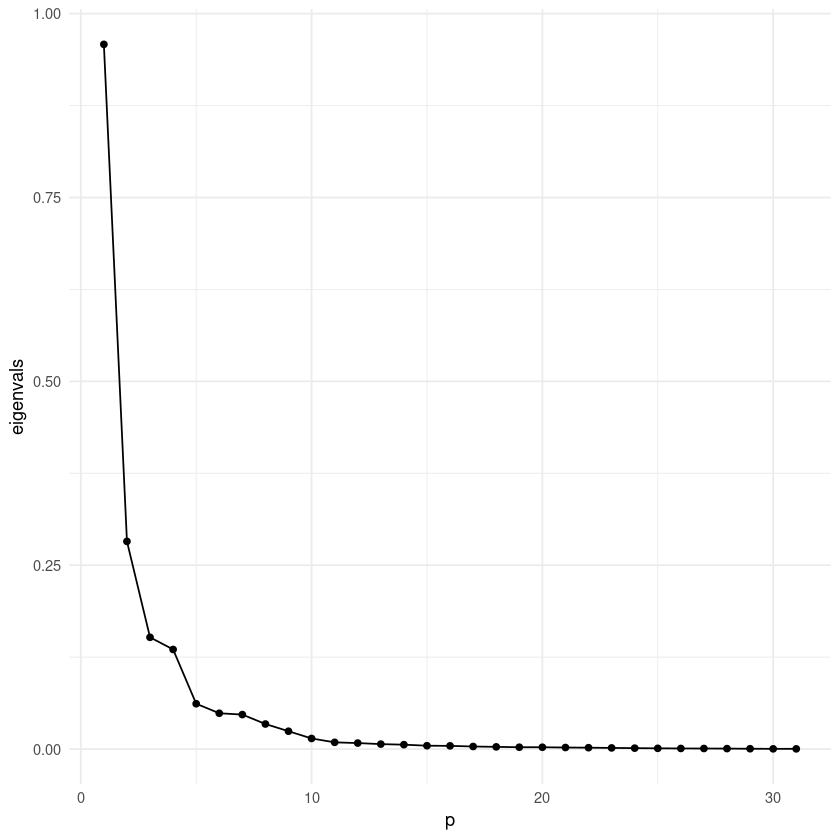

In [13]:
elbow_dat <- data.frame(p = 1:31, eigenvals = specdecomp$values)
elbow_epca_ds <- ggplot(aes(x = p, y = eigenvals), data = elbow_dat) +
geom_line() + 
geom_point () + 
theme_minimal()

ggsave("elbow_epca_ds.pdf", elbow_epca_ds)
elbow_epca_ds

Saving 6.67 x 6.67 in image


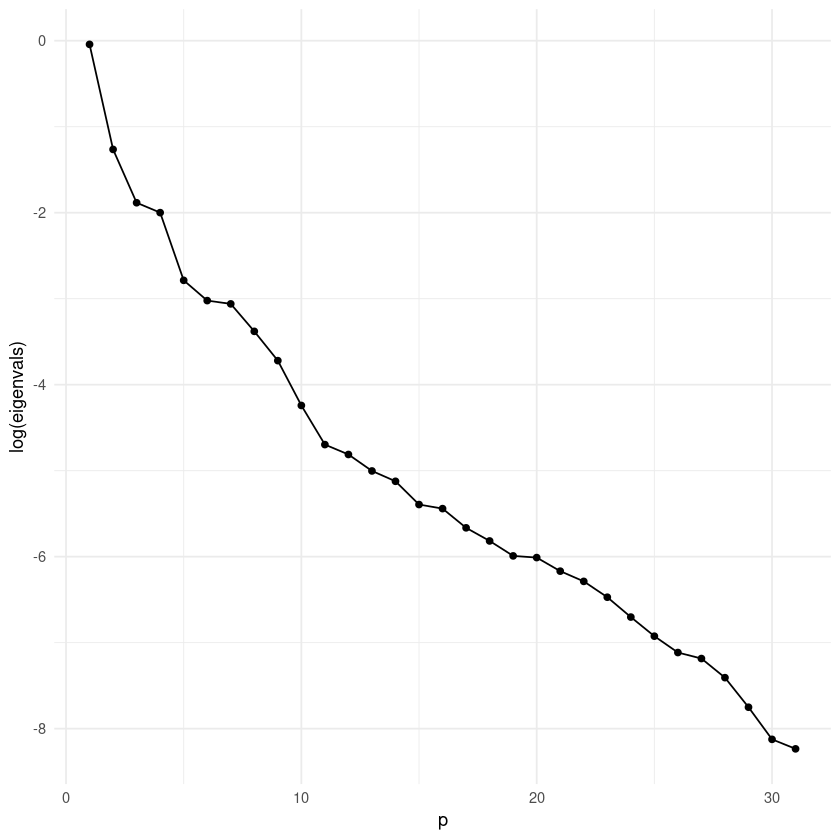

In [96]:
elbow_epca_ds_log <- ggplot(aes(x = p, y = log(eigenvals)), data = elbow_dat) +
geom_line() + 
geom_point () + 
theme_minimal()

ggsave("elbow_log_epca_ds.pdf", elbow_epca_ds_log)
elbow_epca_ds_log

In [15]:
donau_iller <- 1:12
lech <- 20:22
naab <- 23:24
regen <- 25:27
isar <- 14:19
inn <- c(13, 28:31)

danube$info$arm <- NA
danube$info$arm[donau_iller] <- "arm1"
danube$info$arm[lech] <- "arm2"
danube$info$arm[naab] <- "arm3"
danube$info$arm[regen] <- "arm4"
danube$info$arm[isar] <- "arm5"
danube$info$arm[inn] <- "arm6"

In [16]:
arm1 = transform_unitfrechet(apply(Xtrafo[,donau_iller], 1, max))
arm2 = transform_unitfrechet(apply(Xtrafo[, lech], 1, max))
arm3 = transform_unitfrechet(apply(Xtrafo[, naab], 1, max))
arm4 = transform_unitfrechet(apply(Xtrafo[, regen], 1, max))
arm5 = transform_unitfrechet(apply(Xtrafo[, isar], 1, max))
arm6 = transform_unitfrechet(apply(Xtrafo[, inn], 1, max))

dat_plot_riverarm_max <- data.frame(
    arm1 = arm1, 
    arm2 = arm2, 
    arm3 = arm3, 
    arm4 = arm4, 
    arm5 = arm5, 
    arm6 = arm6
)


### plot the river arms for better data presentation

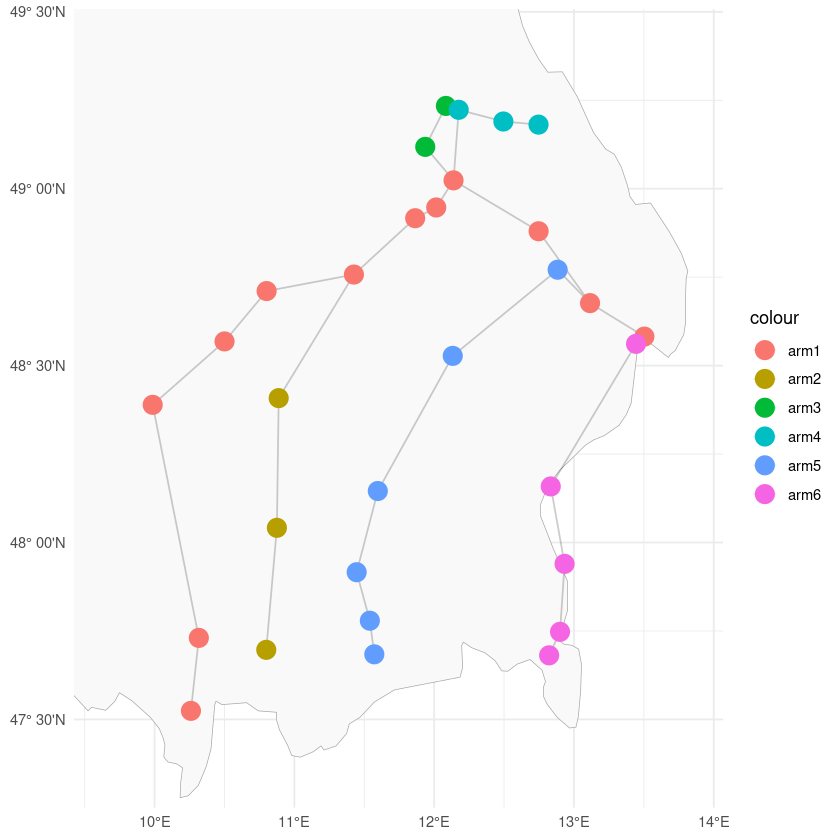

In [17]:
p <- graphicalExtremes::plotDanube(returnGGPlot = T)

pdanube_arms <- p + geom_point(aes(x = Long, y = Lat, color = arm), data = danube$info, size = 5) + theme_minimal()
pdanube_arms

In [18]:
ggsave("arms_danube.pdf", pdanube_arms, width = 12, height = 12, dpi = 320)

### Create plots of the extremal principal components

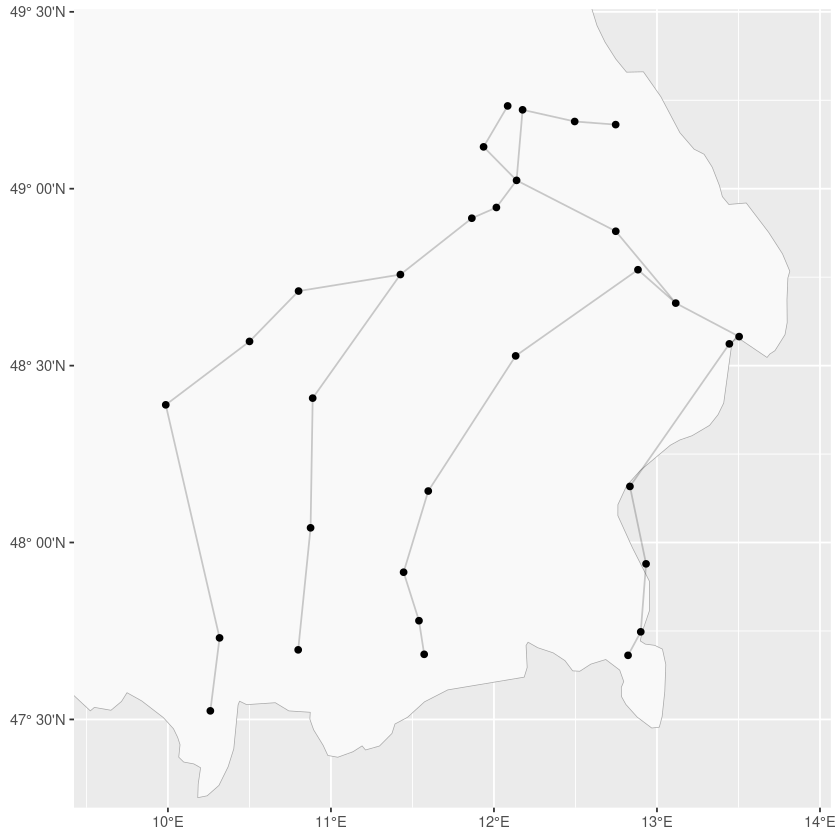

In [19]:
p <- graphicalExtremes::plotDanube(returnGGPlot = T)
p

In [20]:
enc <- specdecomp$vectors
enc <- data.frame(enc)
names(enc) <- paste0("PC", 1:31)
enc$lat <- danube$info$Lat
enc$lon <- danube$info$Long

Saving 6.67 x 6.67 in image


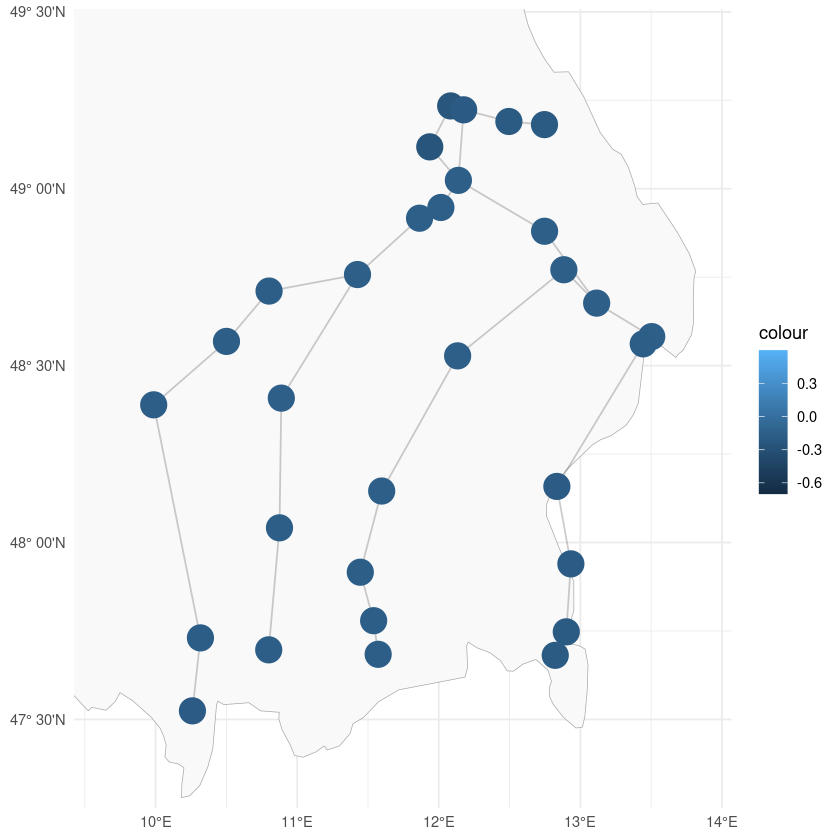

In [21]:
pc1_ds <- p + geom_point(aes(x = lon, y = lat, color = PC1), size = 7, data = enc) +
theme_minimal() + 
scale_color_gradient(limits=c(-0.7, 0.6))

ggsave("danube_pc1_ds.pdf", pc1_ds)
pc1_ds

Saving 6.67 x 6.67 in image


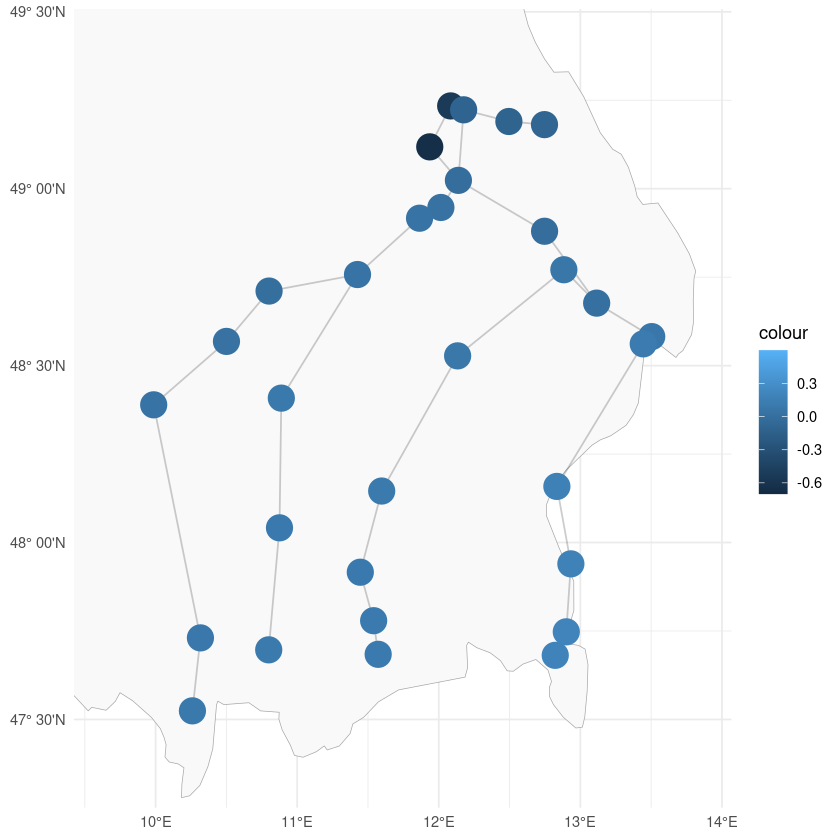

In [22]:
pc2_ds <- p + geom_point(aes(x = lon, y = lat, color = PC2), size = 7, data = enc) +
theme_minimal() + 
scale_color_gradient(limits=c(-0.7, 0.6))

ggsave("danube_pc2_ds.pdf", pc2_ds)
pc2_ds

Saving 6.67 x 6.67 in image


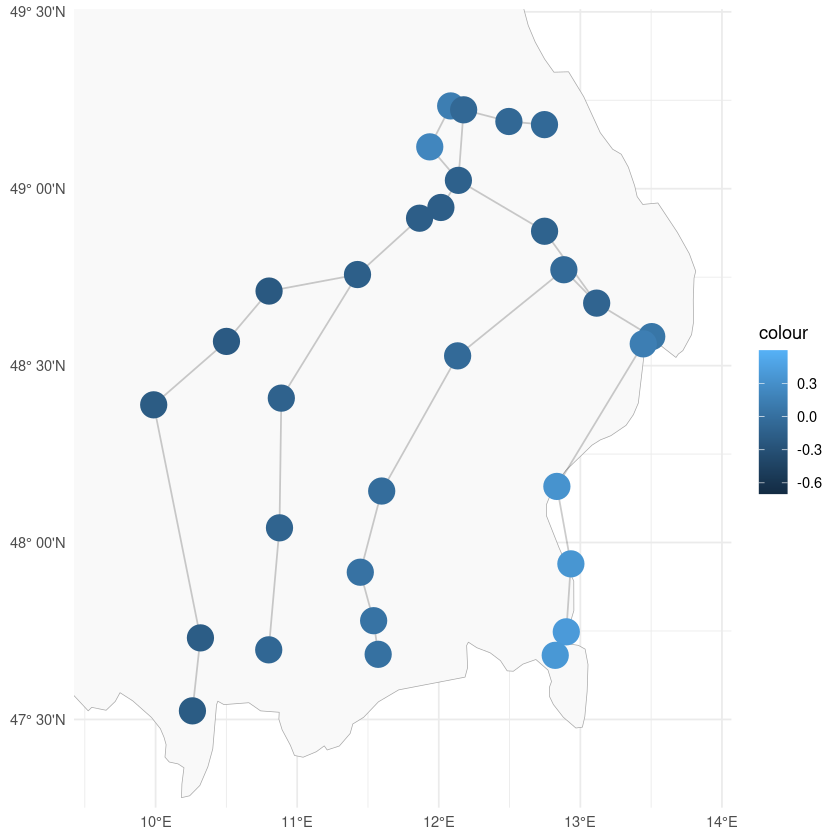

In [23]:
pc3_ds <- p + geom_point(aes(x = lon, y = lat, color = PC3), size = 7, data = enc) +
theme_minimal() + 
scale_color_gradient(limits=c(-0.7, 0.6))

ggsave("danube_pc3_ds.pdf", pc3_ds)
pc3_ds

Saving 6.67 x 6.67 in image


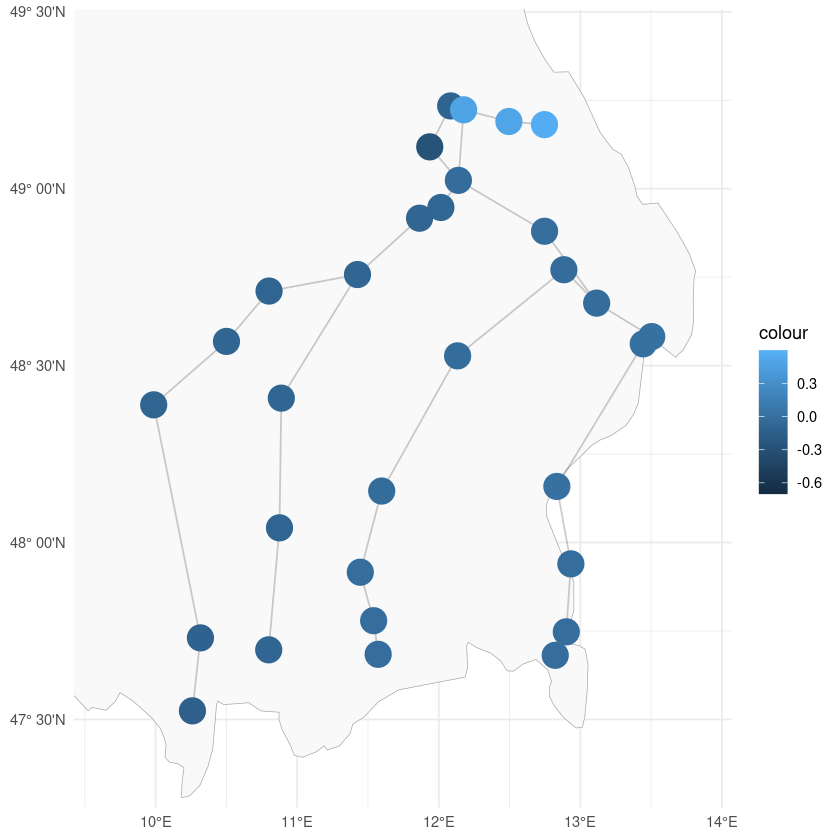

In [24]:
pc4_ds <- p + geom_point(aes(x = lon, y = lat, color = PC4), size = 7, data = enc) +
theme_minimal() + 
scale_color_gradient(limits=c(-0.7, 0.6))

ggsave("danube_pc4_ds.pdf", pc4_ds)
pc4_ds

Saving 6.67 x 6.67 in image


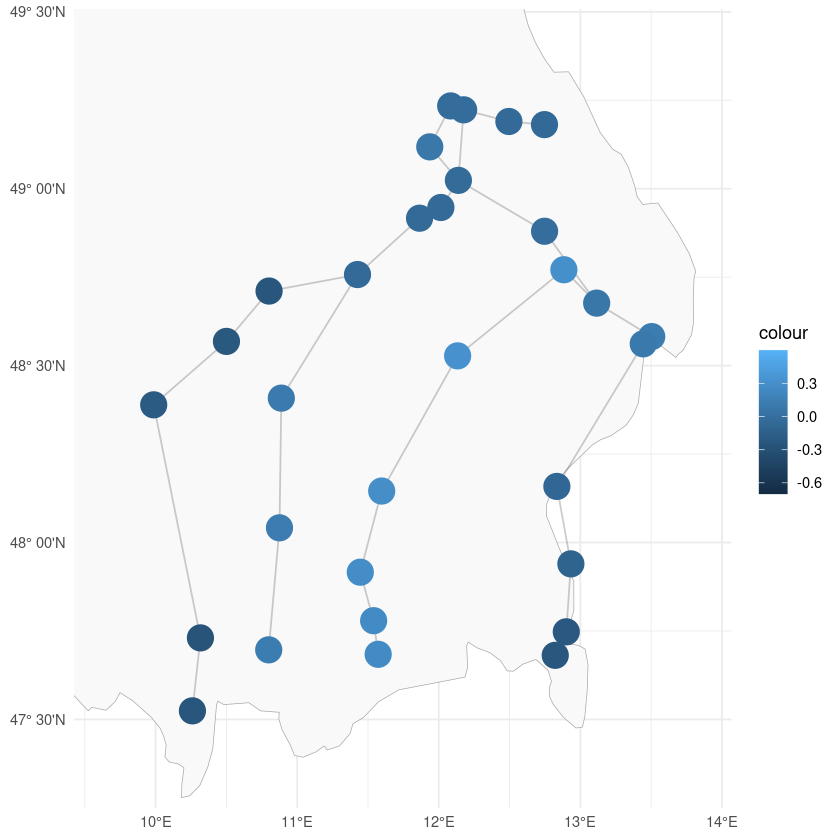

In [25]:
pc5_ds <- p + geom_point(aes(x = lon, y = lat, color = PC5), size = 7, data = enc) +
theme_minimal() + 
scale_color_gradient(limits=c(-0.7, 0.6))

ggsave("danube_pc5_ds.pdf", pc5_ds)

pc5_ds

Saving 6.67 x 6.67 in image


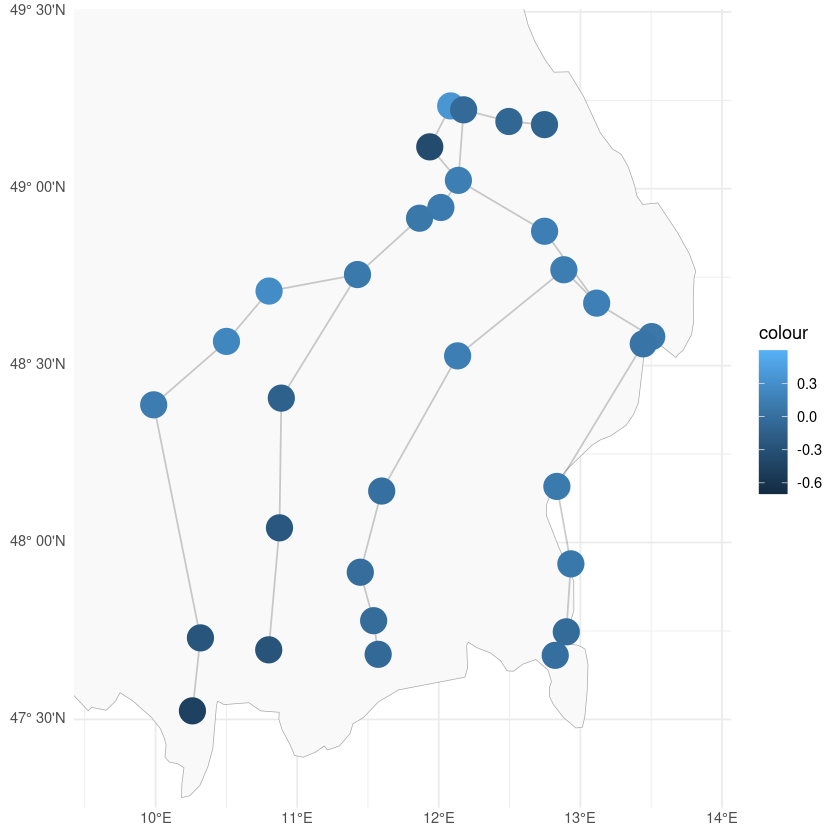

In [26]:
pc6_ds <- p + geom_point(aes(x = lon, y = lat, color = PC6), size = 7, data = enc) +
theme_minimal() + 
scale_color_gradient(limits=c(-0.7,0.6))

ggsave("danube_pc6_ds.pdf", pc6_ds)
pc6_ds

In [94]:
rec <- Xtrafo %*% specdecomp$vectors[,1:6] %*% t(specdecomp$vectors[,1:6])
ds_rec_dat <- data.frame(rec)
ds_rec_dat <- full_join(data.frame(Xtrafo), ds_rec_dat)
ds_rec_dat$is_rec <- c(rep(F, dim(rec)[1]), rep(T, dim(rec)[1]))

Joining with `by = join_by(X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12,
X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28,
X29, X30, X31)`


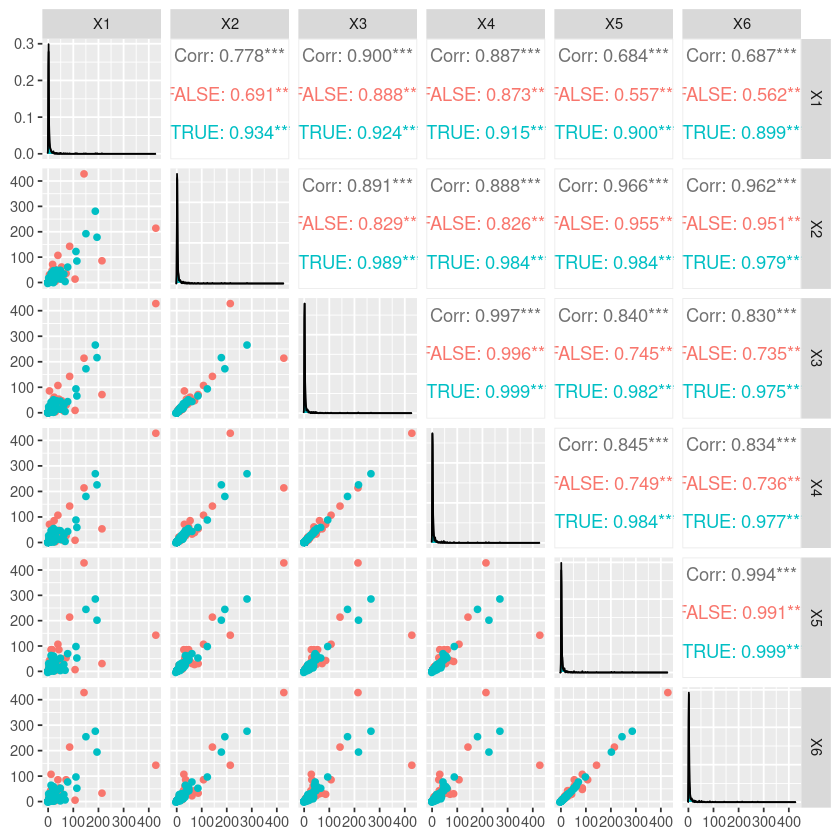

In [95]:
ggpairs(ds_rec_dat, columns = 1:6, aes(color = is_rec))

# Cooley Thibaud PCA for extremes 

In [30]:
# Tail pairwise dependence matrix code by Yiang 

decls <- function(x, th, k) {
    ## Ordinary decluster.
    id.big <- which(x > th)
    id.dif <- diff(id.big)
    tick <- which(id.dif >= k)
    start <- id.big[c(1, tick + 1)]              # Where a new cluster begins
    end <- c(id.big[tick], last(id.big, 1))
    n <- length(start)
    id.res <- rep(0, n)
    for ( i in 1 : n) {
        temp <- x[start[i] : end[i]]
        id.res[i] <- which(temp == max(temp, na.rm = TRUE))[1] + start[i] - 1
    }
    id.res
}

rw.Sigma <- function(X, u = 0.98, decluster = F) {
    ## Compute TPDM
    P <- ncol(X)                      # Number of stations
    M <- nrow(X)                      # Number of obs
    Sigma <- matrix(0, P, P)
    for ( i in 1 : P) {
        if (i %% 5 == 0) print(i)
        for ( j in 1 : P) {
            r <- sqrt(X[, i] ^ 2 + X[, j] ^ 2)
            w1 <- X[, i] / r
            w2 <- X[, j] / r
            th <- quantile(r, u, na.rm = TRUE)
            if(decluster) {
                id <- decls(r, th, 5)
            } else {
                id <- which(r > th)
            } 
            Sigma[i, j] <- sum(w1[id] * w2[id], na.rm = TRUE) / (length(id)) * 2
        }
    }
    Sigma
}

##applies the transformation t
trans <- function(x)
{
    ##because it takes an exponential, this function flakes out if x is too big
    ##hence for big values of x, we return x
    v <- log(1 + exp(x))
    id <- which(x < -20)
    v[!is.finite(v)] <- x[!is.finite(v)]
    v[id] <- exp(x[id])
    return(v)
}

##applies the inverse transformation t^{-1}
invTrans <- function(v)
{
    ##same trickeration for big values of v
    ##still returns -Inf if v is machine zero
    x <- log(exp(v) - 1)
    x[!is.finite(x) & v > 1 & !is.na(x)] <- v[!is.finite(x) & v > 1 &
                                                  !is.na(x)]

    return(x)
}

In [53]:
# use a multiplicatively rescaled estimator to ensure that the ecdf does not take the values 0 and 1.
ecdf_shifted <- function(z) length(z) / (length(z) + 1) * ecdf(z)(z)

In [54]:
summary(ecdf_shifted(Xtrafo))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.002035 0.250659 0.501243 0.501167 0.751526 0.999925 

In [55]:
# Transform data to approximately 2-Fréchet margins 
Xtrafo_2frech <- apply(Xtrafo, 2, function(z) sqrt(- 1 / log(ecdf_shifted(z))))

In [56]:
tpdm_orig <- rw.Sigma(Xtrafo_2frech)
tpdm <- nearPD(tpdm_orig)$mat

[1] 5
[1] 10
[1] 15
[1] 20
[1] 25
[1] 30


In [57]:
eigen(tpdm_orig)

eigen() decomposition
$values
 [1] 24.219023914  2.431251665  1.683876840  0.815767672  0.549200199
 [6]  0.400209803  0.286820353  0.239619423  0.142001153  0.127766054
[11]  0.107141071  0.094114560  0.088870098  0.077586543  0.066761986
[16]  0.053264525  0.039418197  0.033529060  0.025853086  0.011910857
[21]  0.006109675 -0.008479257 -0.011962333 -0.021332645 -0.028029806
[26] -0.036826097 -0.039481349 -0.072417506 -0.076407459 -0.087724725
[31] -0.117435559

$vectors
            [,1]        [,2]        [,3]         [,4]         [,5]         [,6]
 [1,] -0.1877538 -0.13878268 -0.10789027 -0.010972049  0.256188448 -0.008314849
 [2,] -0.1958510  0.06021372  0.12785624  0.057751915  0.178830945  0.076133146
 [3,] -0.1942306  0.01181138  0.13738793 -0.082504874  0.198167271  0.043422603
 [4,] -0.1939444  0.02557990  0.14747624 -0.072154992  0.194914468  0.065990413
 [5,] -0.1918286  0.13335145  0.08858582 -0.145651321  0.105393217  0.078133435
 [6,] -0.1892902  0.18525086  0.05098739 -

In [58]:
specdecomp_cy <- eigen(tpdm)
if(specdecomp_cy$vectors[1,1] < 0) specdecomp_cy$vectors[,1] <- -specdecomp_cy$vectors[,1] 

Saving 6.67 x 6.67 in image


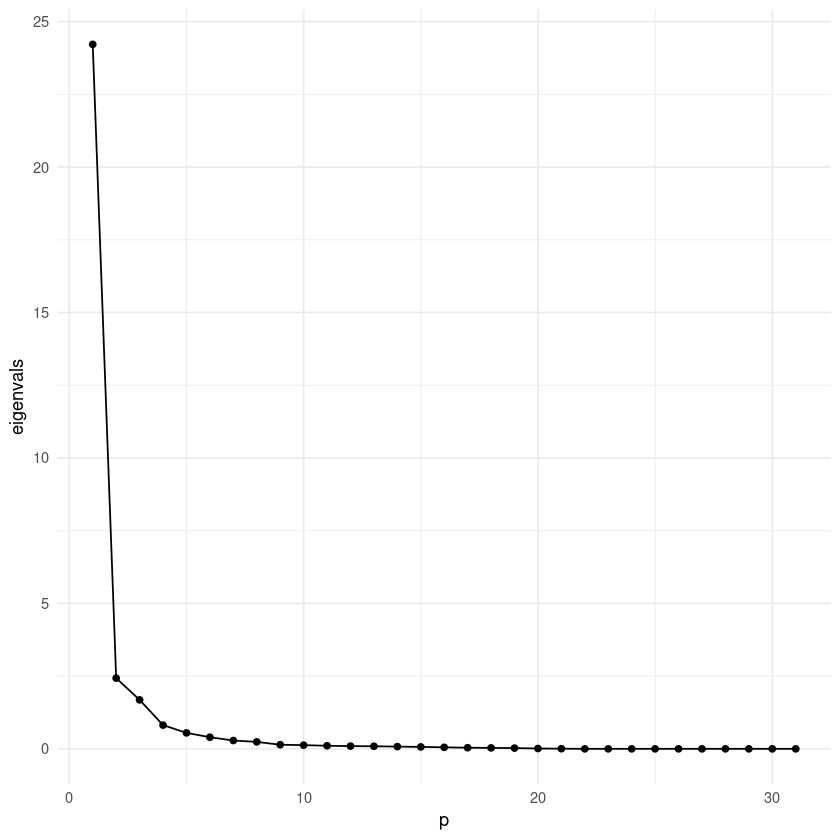

In [59]:
plot_errs_cy <- data.frame(p = 1:31, eigenvals = specdecomp_cy$values)

elbow_dat_cy <- data.frame(p = 1:31, eigenvals = specdecomp_cy$values[1:31])
elbow_cy <- ggplot(aes(x = p, y = eigenvals), data = elbow_dat_cy) +
geom_line() + 
geom_point () + 
theme_minimal()

ggsave("elbow_epca_cy.pdf", elbow_cy)
elbow_cy

Saving 6.67 x 6.67 in image


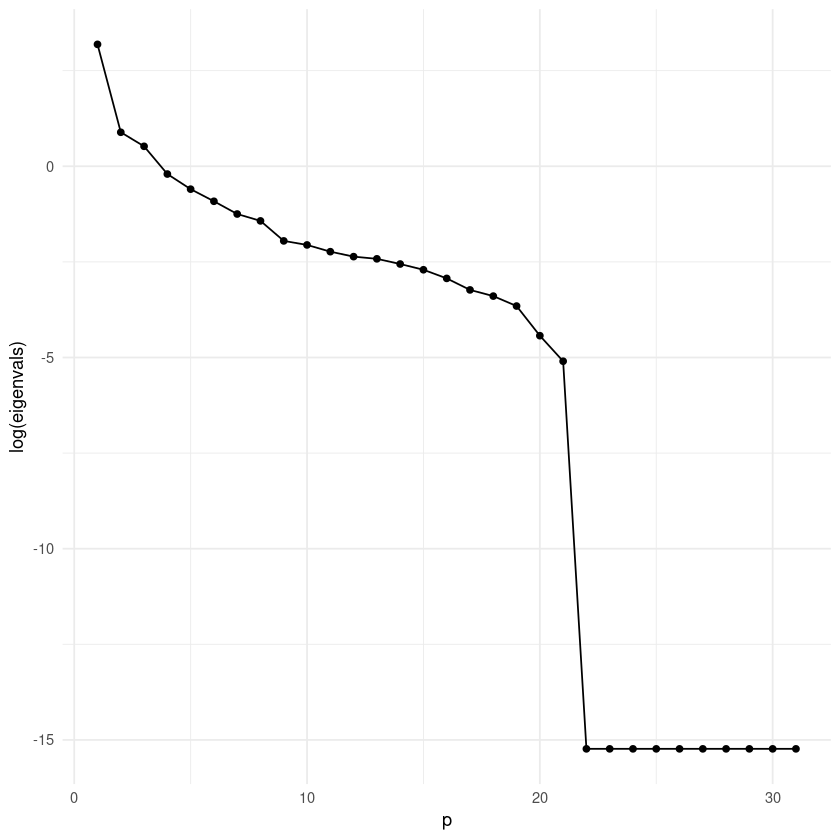

In [60]:
plot_errs_cy <- data.frame(p = 1:31, eigenvals = specdecomp_cy$values)

elbow_dat_cy <- data.frame(p = 1:31, eigenvals = specdecomp_cy$values[1:31])
elbow_cy <- ggplot(aes(x = p, y = log(eigenvals)), data = elbow_dat_cy) +
geom_line() + 
geom_point () + 
theme_minimal()

ggsave("elbow_log_epca_cy.pdf", elbow_cy)
elbow_cy

In [61]:
enc_cy <- specdecomp_cy$vectors
enc_cy <- data.frame(enc_cy)
names(enc_cy) <- paste0("PC", 1:31)
enc_cy$lat <- danube$info$Lat
enc_cy$lon <- danube$info$Long

Saving 6.67 x 6.67 in image


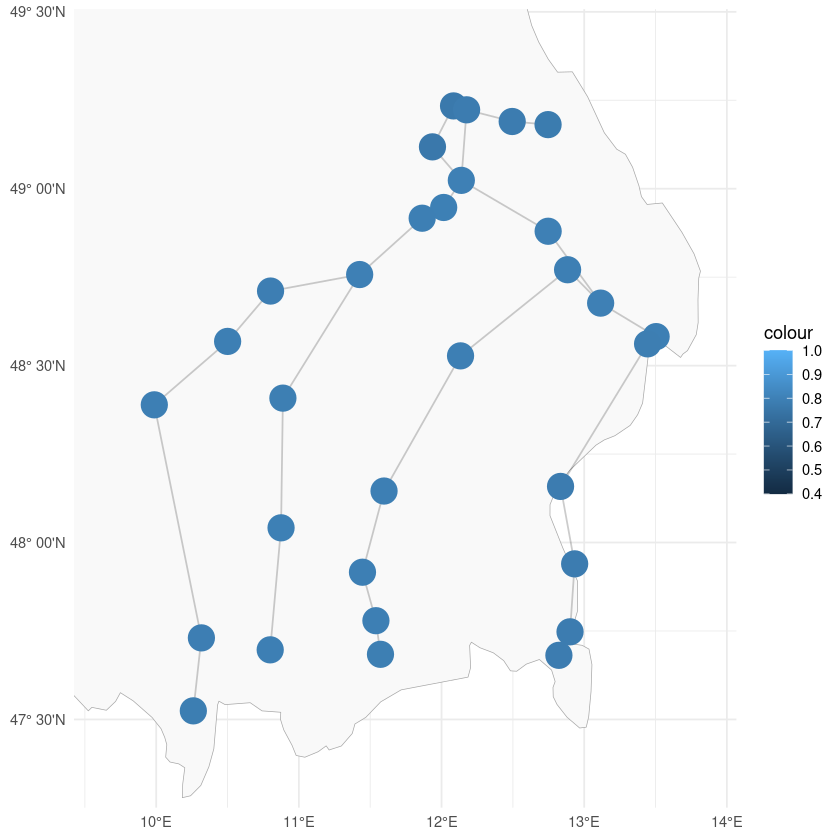

In [62]:
pc1_cy <- p + geom_point(aes(x = lon, y = lat, color = trans(PC1)), size = 7, data = enc_cy) +
theme_minimal() + 
scale_color_gradient(limits=c(0.4,1))

ggsave("danube_pc1_cy.pdf", pc1_cy)
pc1_cy

Saving 6.67 x 6.67 in image


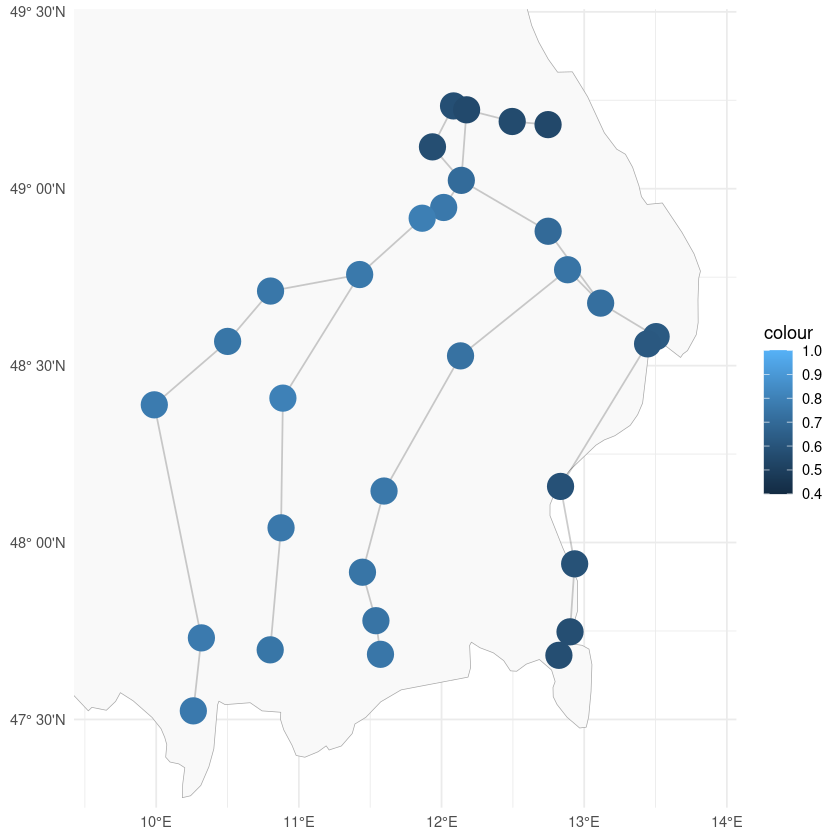

In [63]:
pc2_cy <- p + geom_point(aes(x = lon, y = lat, color = trans(PC2)), size = 7, data = enc_cy) +
theme_minimal()+ 
scale_color_gradient(limits=c(0.4,1))

ggsave("danube_pc2_cy.pdf", pc2_cy)
pc2_cy

Saving 6.67 x 6.67 in image


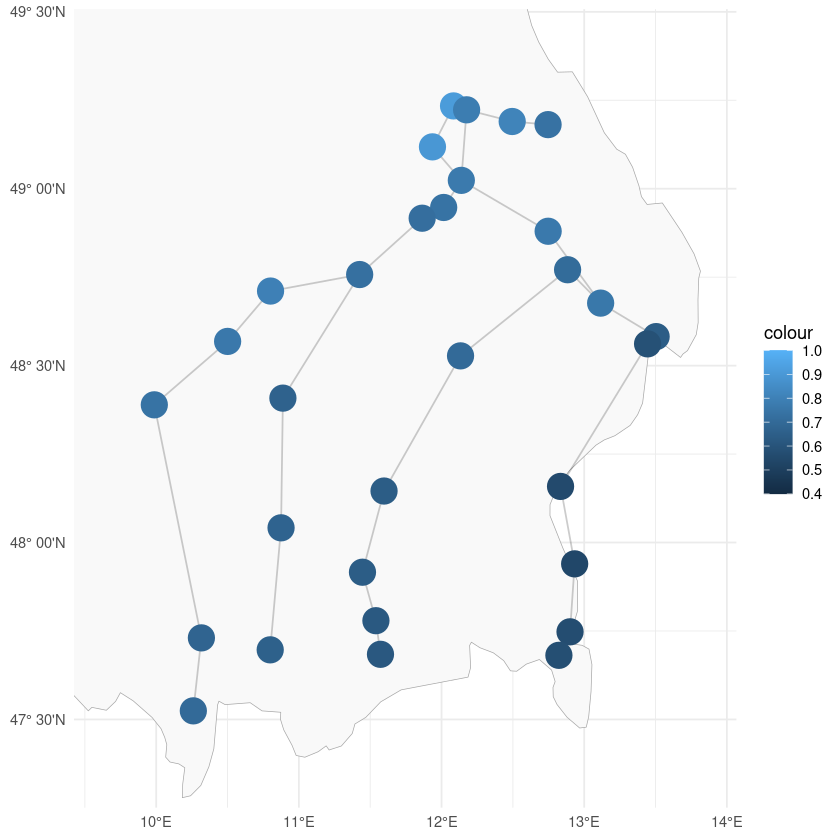

In [64]:
pc3_cy <- p + geom_point(aes(x = lon, y = lat, color = trans(PC3)), size = 7, data = enc_cy) +
theme_minimal()+ 
scale_color_gradient(limits=c(0.4,1))

ggsave("danube_pc3_cy.pdf", pc3_cy)
pc3_cy

Saving 6.67 x 6.67 in image


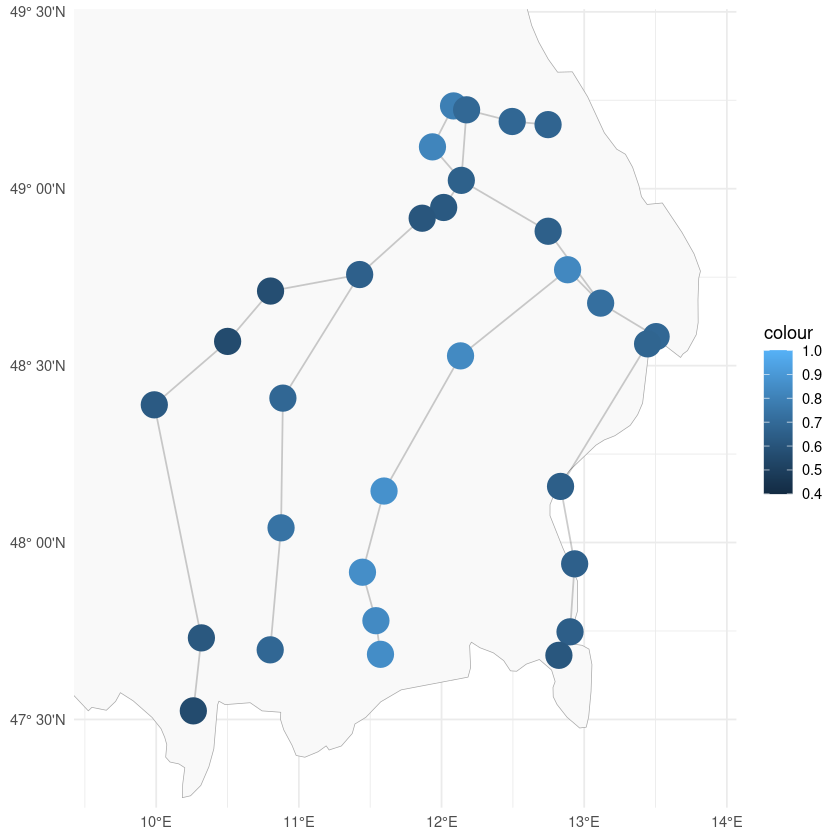

In [65]:
pc4_cy <- p + geom_point(aes(x = lon, y = lat, color = trans(PC4)), size = 7, data = enc_cy) +
theme_minimal()+ 
scale_color_gradient(limits=c(0.4,1))

ggsave("danube_pc4_cy.pdf", pc4_cy)
pc4_cy

Saving 6.67 x 6.67 in image


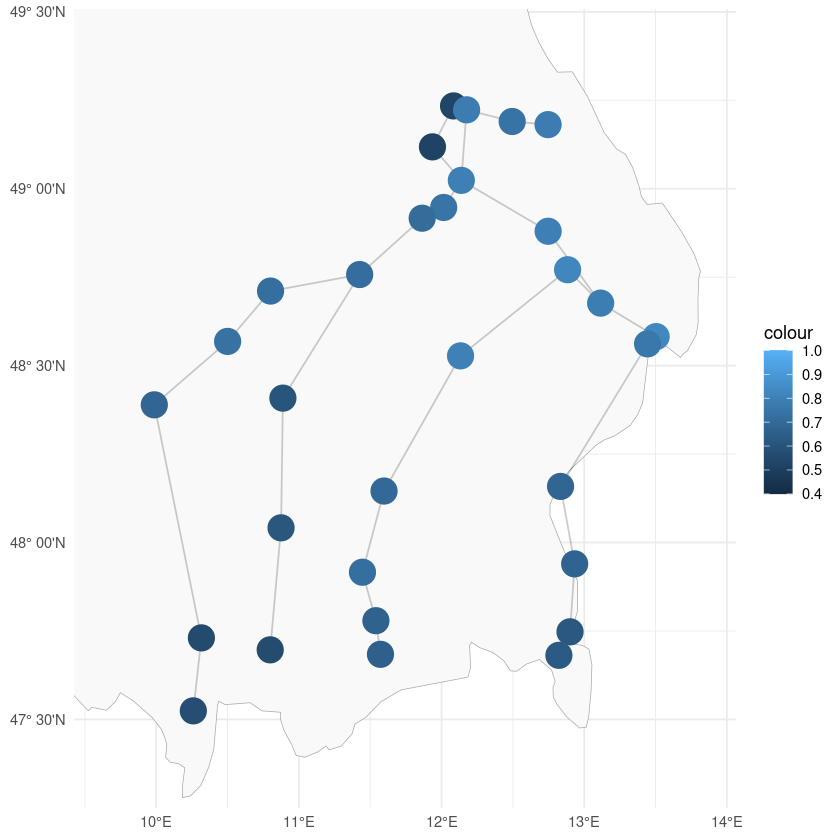

In [66]:
pc5_cy <- p + geom_point(aes(x = lon, y = lat, color = trans(PC5)), size = 7, data = enc_cy) +
theme_minimal() + 
scale_color_gradient(limits=c(0.4,1))

ggsave("danube_pc5_cy.pdf", pc5_cy)
pc5_cy

Saving 6.67 x 6.67 in image


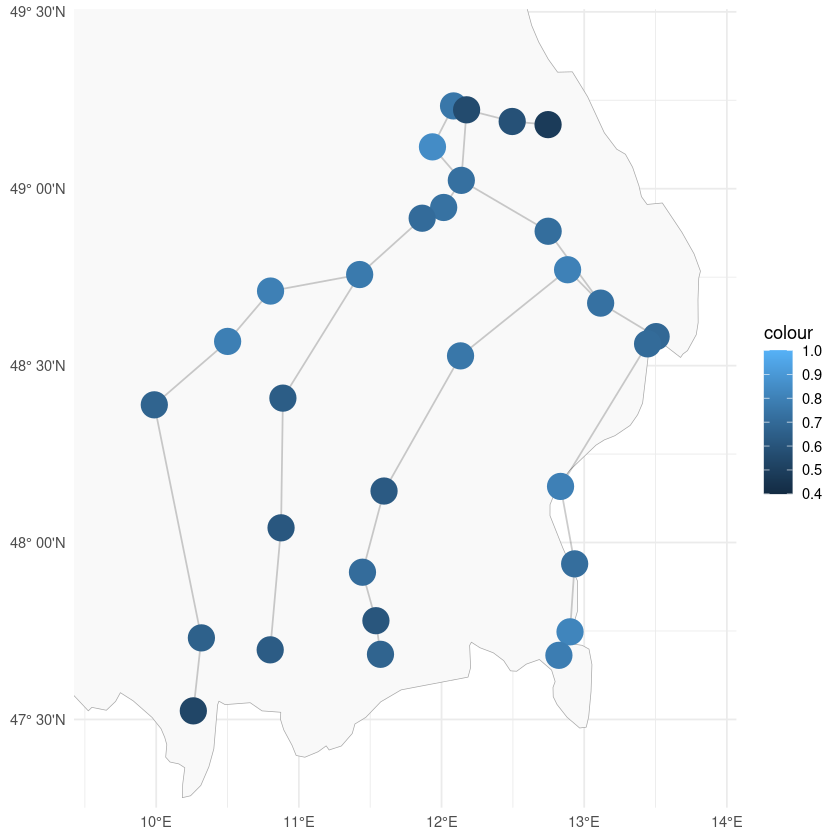

In [67]:
pc6_cy <- p + geom_point(aes(x = lon, y = lat, color = trans(PC6)), size = 7, data = enc_cy) +
theme_minimal() + 
scale_color_gradient(limits=c(0.4,1))

ggsave("danube_pc6_cy.pdf", pc6_cy)
pc6_cy

### Checking reconstructions

In [68]:
specdecomp_cy

eigen() decomposition
$values
 [1] 2.421902e+01 2.431251e+00 1.683877e+00 8.157676e-01 5.492002e-01
 [6] 4.002098e-01 2.868203e-01 2.396194e-01 1.420011e-01 1.277660e-01
[11] 1.071411e-01 9.411455e-02 8.887009e-02 7.758654e-02 6.676198e-02
[16] 5.326452e-02 3.941819e-02 3.352906e-02 2.585308e-02 1.191086e-02
[21] 6.109674e-03 2.421902e-07 2.421902e-07 2.421902e-07 2.421902e-07
[26] 2.421902e-07 2.421902e-07 2.421902e-07 2.421902e-07 2.421902e-07
[31] 2.421902e-07

$vectors
           [,1]        [,2]        [,3]         [,4]         [,5]         [,6]
 [1,] 0.1877538 -0.13878268 -0.10789027 -0.010972052  0.256188443 -0.008314846
 [2,] 0.1958510  0.06021372  0.12785623  0.057751911  0.178830947  0.076133146
 [3,] 0.1942306  0.01181137  0.13738793 -0.082504878  0.198167273  0.043422604
 [4,] 0.1939444  0.02557989  0.14747624 -0.072154994  0.194914467  0.065990411
 [5,] 0.1918286  0.13335145  0.08858582 -0.145651320  0.105393217  0.078133438
 [6,] 0.1892902  0.18525086  0.05098739 -0.17211

In [69]:
enc_cy <- t(specdecomp_cy$vectors[, 1:6]) %*% t(invTrans(Xtrafo_2frech))
rec_cy <- t(specdecomp_cy$vectors[, 1:6] %*% trans(enc_cy))

In [70]:
enc_cy

11.4171712,7.8683498,6.1690357,6.2797402,5.5925246,4.0832814,9.34731579,1.72404179,1.1720707,9.7087367,⋯,-0.20121717,2.0469340,36.1201161,26.9935155,16.77621648,12.901926,14.97138416,6.8258484,1.31031078,4.80854476
0.3512354,1.7626116,1.0614408,1.5411318,1.7223733,0.4030809,1.56516802,0.89639036,0.2433962,-5.1441290,⋯,-2.35847578,-1.1288812,-7.4483375,6.8533877,0.78367574,2.275289,-0.02754756,-3.1409314,-2.08093463,-1.06906967
-4.4587037,-0.8080684,-1.7582136,-0.3644975,-1.9170634,-2.2764499,-0.61823089,0.09753721,-0.5572051,2.0976027,⋯,-0.78284657,-0.4578069,-8.6251327,7.3875538,0.07508076,2.819666,-0.75513589,3.7093710,-0.93773109,-0.04507704
-2.5686950,-0.3216033,0.5560175,-0.5008162,0.8127557,1.1528932,-1.02520829,-1.14324149,-0.2733047,-0.4245653,⋯,0.04287469,0.6261998,0.4579923,-4.7043817,-0.77853148,-2.774074,1.95745030,0.8806851,-0.08926938,1.07007372
-0.9330001,1.1153891,0.3692004,1.4655196,-0.3114321,0.3195290,-0.03524069,-0.10030751,0.8256466,-1.0259209,⋯,0.03590873,0.1750537,0.5302001,2.4834656,-4.32809753,1.120613,0.83198334,0.8330267,0.14721690,0.25794915
1.0214572,-0.2653084,-0.9377653,-0.4016383,-0.6060715,-0.6530926,-1.14984831,0.36729722,-0.1181599,-1.2445946,⋯,-0.34348554,-0.5218439,4.3030455,0.8473605,-1.31012436,1.633232,0.22515963,-1.2198744,0.16736511,-0.69421475


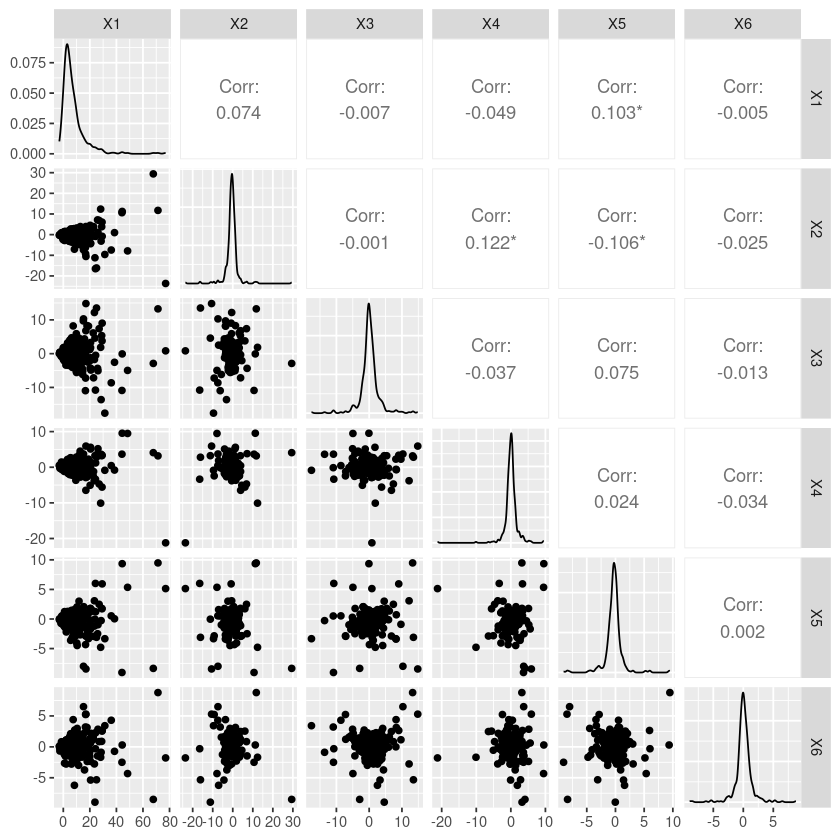

In [71]:
ggpairs(data.frame(t(enc_cy)))

In [72]:
dim(Xtrafo_2frech)

[1] 428  31

Joining with `by = join_by(X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12,
X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28,
X29, X30, X31)`


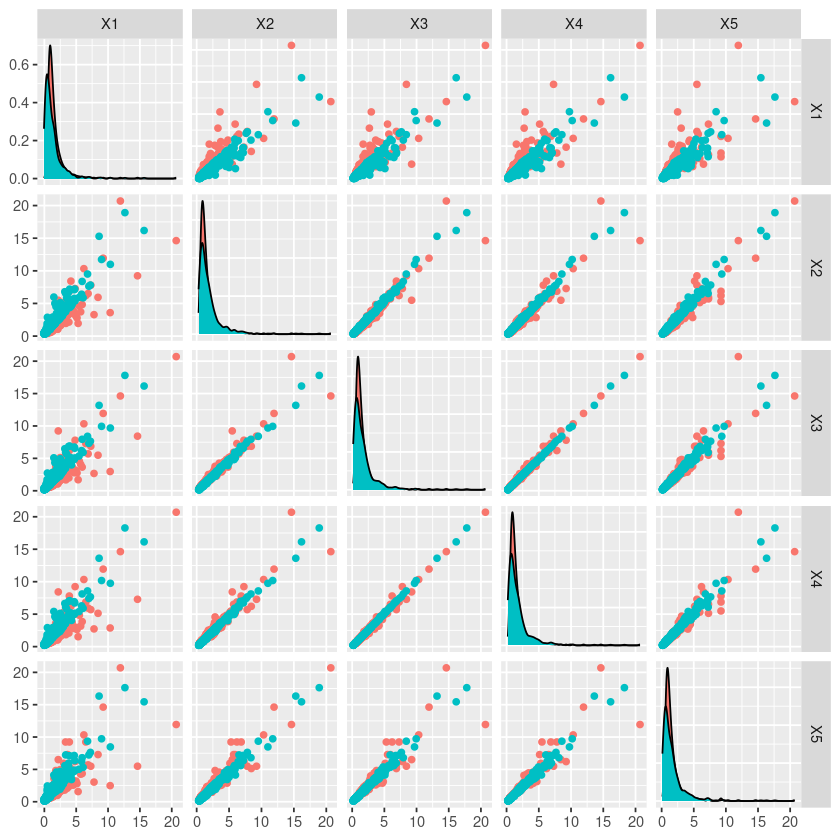

In [75]:
pairs_dat <- data.frame(Xtrafo_2frech)
tmp <- data.frame(rec_cy)
pairs_dat <- full_join(pairs_dat, tmp)
pairs_dat$is_rec <- c(rep("False", 428), rep("True", 428))

ggpairs(pairs_dat, columns = 1:5, aes(color = is_rec), upper = list(continuous = "points"))

### Apply spherical K-means to the danube dataset

In [76]:
library(skmeans)

kmeanserrs = data.frame(k = 2:15, errs = NA)
kmeansclusterings = list()
for(k in 2:15) {
    tmp <- skmeans::skmeans(Xtrafo[which(apply(Xtrafo, 1, max) > 10), ], k = k)
    kmeansclusterings[[k]] <- tmp
    kmeanserrs[k,2] <- tmp$value
}

Saving 6.67 x 6.67 in image
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


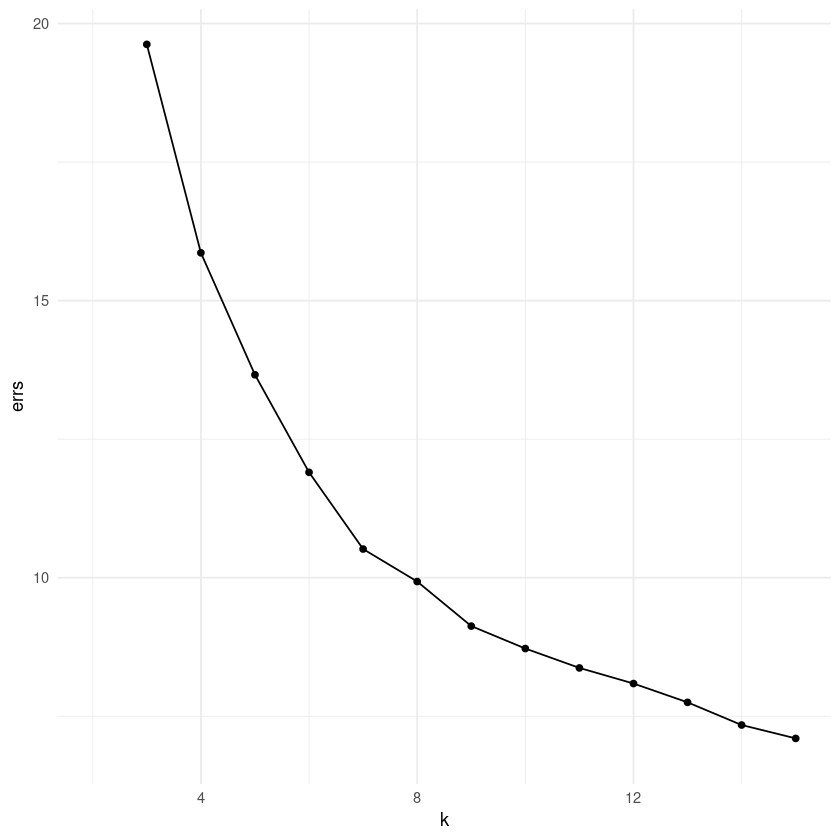

In [77]:
elbow_jw <- ggplot(aes(x = k, y = errs), data = kmeanserrs) + 
geom_line() +
geom_point() + 
theme_minimal()

ggsave("danube_elbow_kmjw.pdf", elbow_jw)
elbow_jw

In [78]:
prototypes_dat <- data.frame(t(kmeansclusterings[[6]]$prototypes))
names(prototypes_dat) <- paste0("P", 1:6)
prototypes_dat$lat = danube$info$Lat
prototypes_dat$lon = danube$info$Long

Saving 6.67 x 6.67 in image


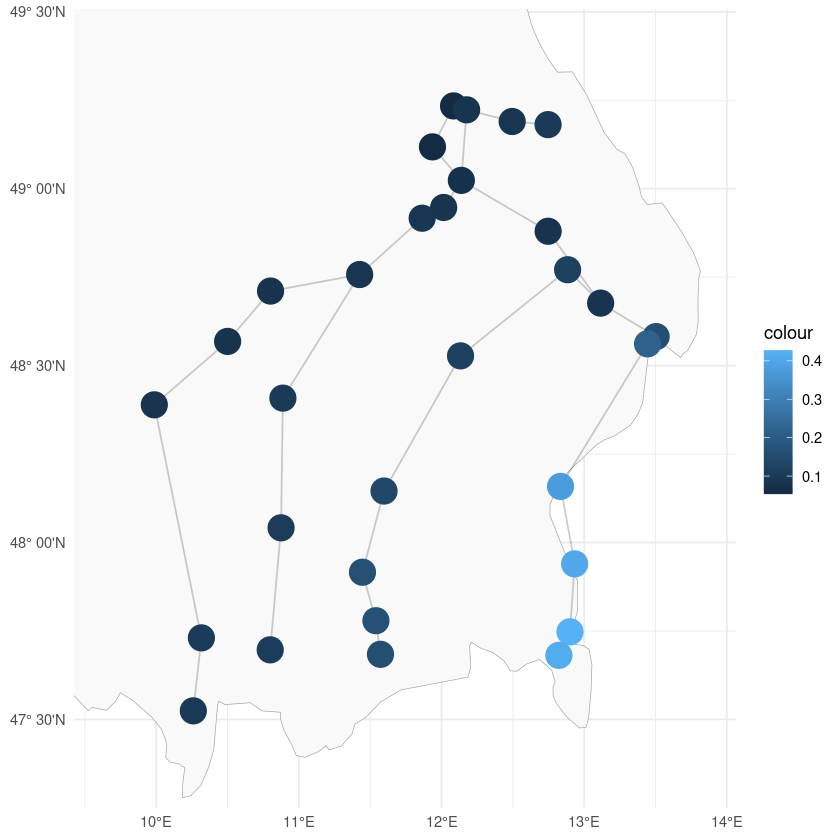

In [79]:
c1 <- p + geom_point(aes(x = lon, y = lat, color = P1), size = 7, data = prototypes_dat) +
theme_minimal()

ggsave("danube_c1_jw.pdf", c1)
c1

Saving 6.67 x 6.67 in image


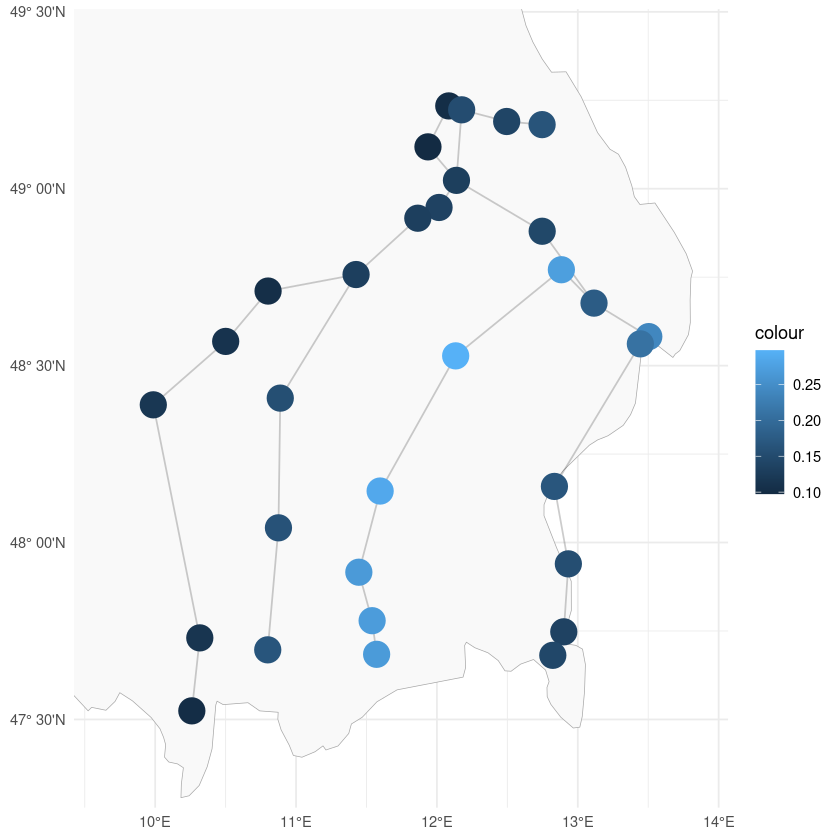

In [80]:
c2 <- p + geom_point(aes(x = lon, y = lat, color = P2), size = 7, data = prototypes_dat) +
theme_minimal()

ggsave("danube_c2_jw.pdf", c2)
c2

Saving 6.67 x 6.67 in image


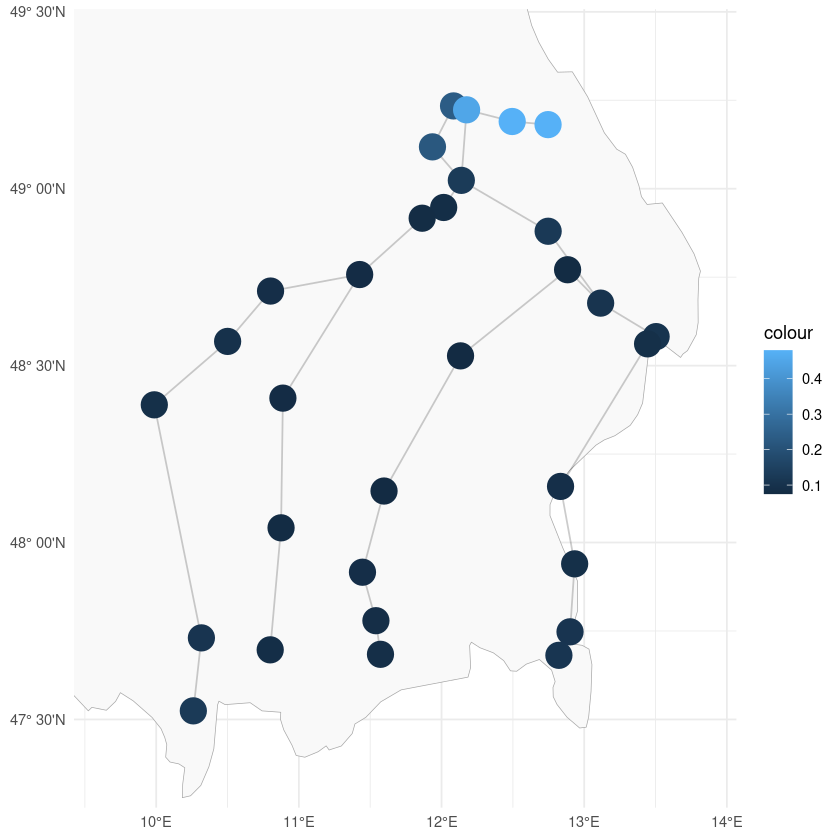

In [81]:
c3 <- p + geom_point(aes(x = lon, y = lat, color = P3), size = 7, data = prototypes_dat) +
theme_minimal()

ggsave("danube_c3_jw.pdf", c3)
c3

Saving 6.67 x 6.67 in image


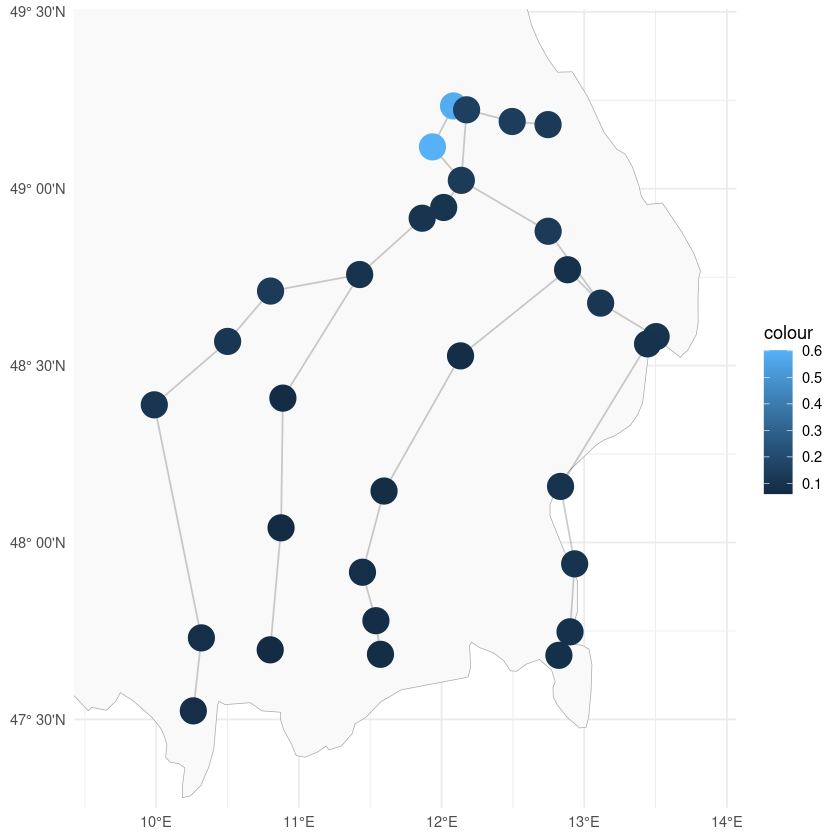

In [82]:
c4 <- p + geom_point(aes(x = lon, y = lat, color = P4), size = 7, data = prototypes_dat) +
theme_minimal()

ggsave("danube_c4_jw.pdf", c4)
c4

Saving 6.67 x 6.67 in image


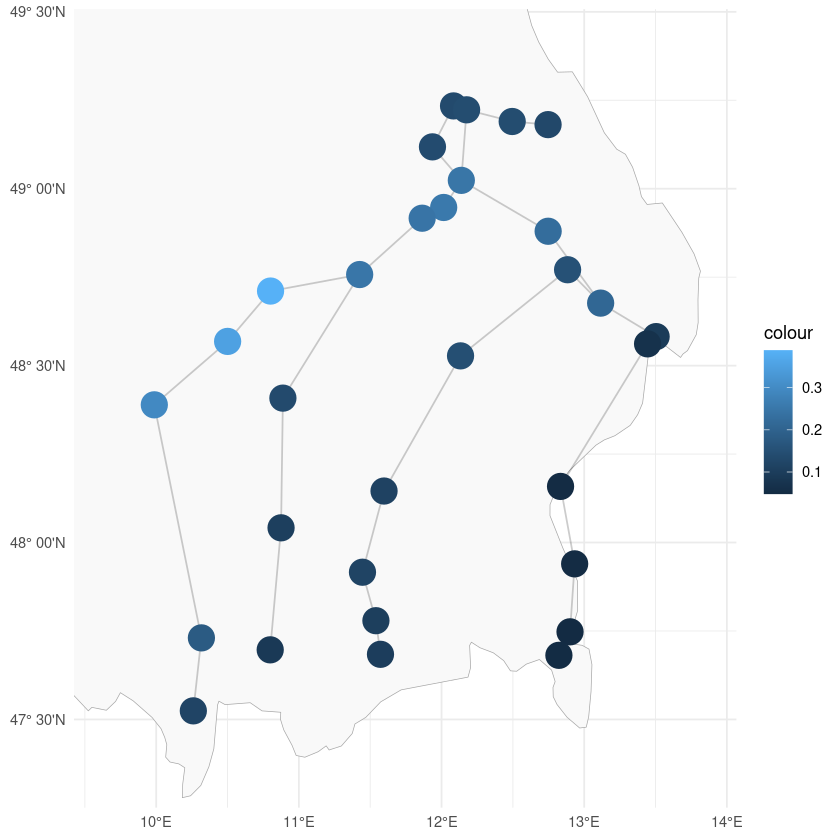

In [83]:
c5 <- p + geom_point(aes(x = lon, y = lat, color = P5), size = 7, data = prototypes_dat) +
theme_minimal()

ggsave("danube_c5_jw.pdf", c5)
c5

Saving 6.67 x 6.67 in image


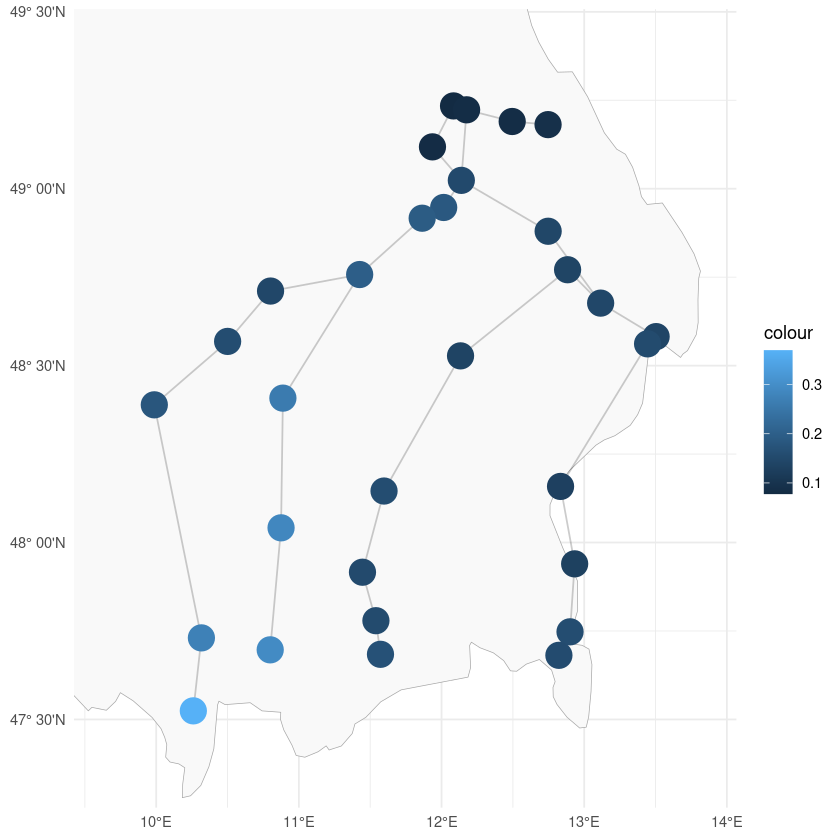

In [84]:
c6 <- p + geom_point(aes(x = lon, y = lat, color = P6), size = 7, data = prototypes_dat) +
theme_minimal()

ggsave("danube_c6_jw.pdf", c6)
c6